# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os

In [2]:
dataset1 = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/mnist.csv'
df = pd.read_csv(dataset1)

In [3]:
df.shape

(9999, 785)

In [15]:
# Membaca dataset
dataset1 = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/mnist.csv'
df = pd.read_csv(dataset1)

# Mengganti nama kolom pertama menjadi "Results"
df = df.rename(columns={df.columns[0]: "Results"})

# Cetak DataFrame setelah mengganti nama kolom
df.head(10)

,Results,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dig = [0,1,2,3,4,5,6,7,8,9]
num = []
for i in range(0,10):
    num.append(len(df[df['Results']==i]))

d = {'Digit': dig, 'Count': num}
df1 = pd.DataFrame(data=d)
df1


,Digit,Count
0,0,980
1,1,1135
2,2,1032
3,3,1010
4,4,982
5,5,892
6,6,958
7,7,1027
8,8,974
9,9,1009


<ipython-input-7-4ffd1c61fe3f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Digit', data=df1, orient='h', palette=colors)


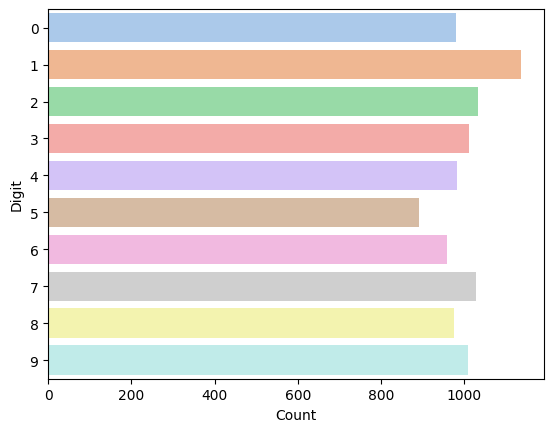

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan skema warna
colors = sns.color_palette("pastel")

# Plot barplot dengan skema warna yang ditentukan
sns.barplot(x='Count', y='Digit', data=df1, orient='h', palette=colors)
plt.show()

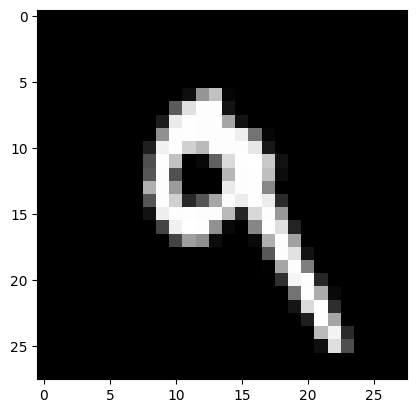

In [8]:
pic = df[6:7].values.reshape(785)[1:].reshape(28,28)
plt.imshow(pic,cmap='gray')

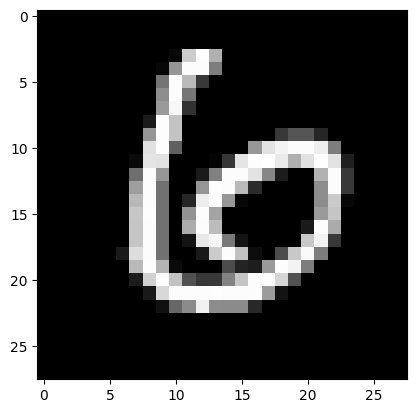

In [10]:
pic = df[10:11].values.reshape(785)[1:].reshape(28,28)
plt.imshow(pic,cmap='gray')

# **Data Preparation**

In [16]:
X = df.drop(['Results'],axis=1)
X.head()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y = df.Results
y.head()

0    2
1    1
2    0
3    4
4    1
Name: Results, dtype: int64

In [19]:
import sklearn.model_selection as skmodel
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size=0.33, random_state=42)
print("length of all data is ","{:,}".format(len(X)))
print("length of training set is","{:,}".format(len(X_train)))
print("length of test set is","{:,}".format(len(X_test)))

length of all data is  9,999
length of training set is 6,699
length of test set is 3,300


In [20]:
x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)
len(X_train)

6699

In [22]:
i = random.randint(0,(len(X_train)))
pic = X_train.iloc[i].values.reshape(28,28)
x_train.shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (6699, 28, 28, 1)
Number of images in x_train 6699
Number of images in x_test 3300


# **Building Model**

In [23]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **Train Model**

In [24]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
210/210 [==============================] - 5s 4ms/step - loss: 0.5120 - accuracy: 0.8488
Epoch 2/10
210/210 [==============================] - 1s 3ms/step - loss: 0.2102 - accuracy: 0.9336
Epoch 3/10
210/210 [==============================] - 1s 3ms/step - loss: 0.1363 - accuracy: 0.9579
Epoch 4/10
210/210 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9687
Epoch 5/10
210/210 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9778
Epoch 6/10
210/210 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9851
Epoch 7/10
210/210 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9881
Epoch 8/10
210/210 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9924
Epoch 9/10
210/210 [==============================] - 1s 3ms/step - loss: 0.0213 - accuracy: 0.9936
Epoch 10/10
210/210 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.9937

# **Model Evaluation**

In [25]:
model.evaluate(x_test, y_test)


104/104 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9642


[0.12871716916561127, 0.9642423987388611]

# **Model Prediction**

In [27]:
len(X_test)
j = random.randint(0,(len(X_test)))

In [28]:
pred = model.predict(x_test[j].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 104ms/step
7


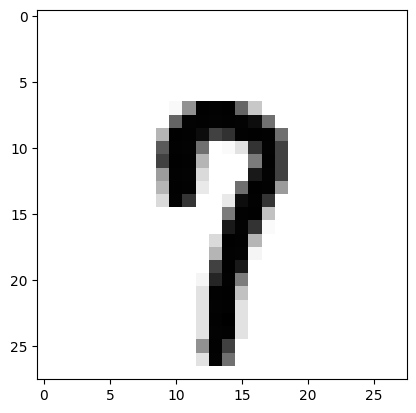

In [29]:
pic1 = X_test.iloc[j].values.reshape(28,28)
plt.imshow(pic1, cmap='Greys')

In [32]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

104/104 [==============================] - 0s 2ms/step


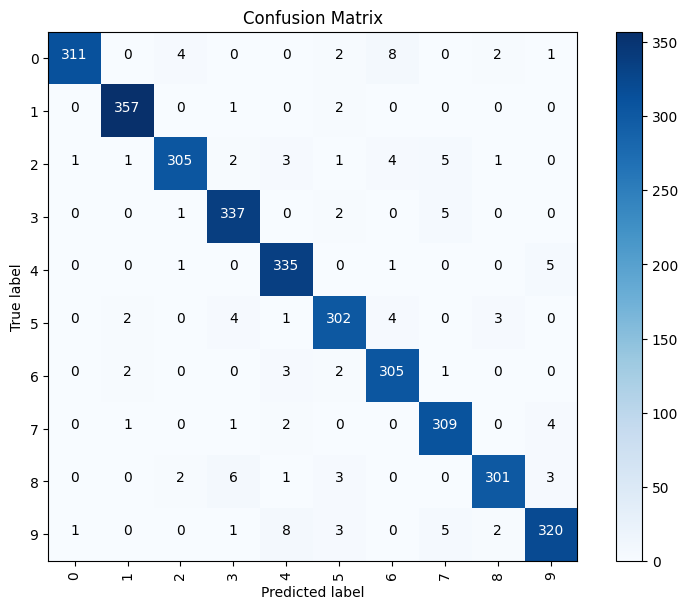

In [48]:
import sklearn.metrics as skmet

# Menghitung confusion matrix
cm = skmet.confusion_matrix(y_true=y_test, y_pred=y_pred)

# Membuat fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Menampilkan confusion matrix
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [42]:
import itertools
import sklearn.metrics as skmet

# Menghitung metrik evaluasi
accuracy = skmet.accuracy_score(y_true=y_test, y_pred=y_pred)
precision = skmet.precision_score(y_true=y_test, y_pred=y_pred, average='macro')
recall = skmet.recall_score(y_true=y_test, y_pred=y_pred, average='macro')
f1 = skmet.f1_score(y_true=y_test, y_pred=y_pred, average='macro')

# Menghitung metrik evaluasi
accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100
f1_percentage = f1 * 100

# Menambahkan teks metrik evaluasi ke plot
print('Accuracy: {:.3f}%'.format(accuracy_percentage))
print('Precision: {:.3f}%'.format(precision_percentage))
print('Recall: {:.3f}%'.format(recall_percentage))
print('F1-Score: {:.3f}%'.format(f1_percentage))

Accuracy: 96.424%
Precision: 96.436%
Recall: 96.391%
F1-Score: 96.397%
